# AirSpace Technologies Technical Screening

<br></br>
- **Author: Tejas Krishna Reddy**
- **Date: 11/06/2020**


### Pseudo Algorithm and Summary:

- Read the log file of all orders.
- Clean each line, remove the first index number and store the rest in a list
- Convert the cleaned lists into dataframe. 
- Normalize the 'package' column to get a detailed dataframe.
- Convert all the values into imperial units.
- Perform Exploratory Data Analysis. Look for connections and actionable insights.
- Perform correlation analysis.
- Plot the results to visually check for hidden insights.
- Perform a basic clustering algorithm to check if there is a way to gain information out of raw data.

### Install the necessary packages for the below analysis. 
- !pip install pandas
- !pip install ast
- !pip install seaborn

In [1]:
# Import the packages
import pandas as pd
import numpy as np
import ast
import seaborn as sns

<br></br>
### Read the data

In [2]:
# Read the log file by each line
with open('order_records.log') as f:
    data = f.readlines()

In [3]:
# Display one example in 'data'
data[1]

"1,{'order_id': 21001, 'package': {'weight': 460, 'volume': 110592, 'imperial_unit': 'false'},'service_line': 34}\n"

<br></br>
#### In the above example, remove the index number (1) and convert the rest of the string into a dictionary and store it back in data

In [4]:
#Remove index from all the lists and store them as dicts
for i in range(len(data)):
    data[i] = ast.literal_eval(data[i].split(',', 1)[1])

In [5]:
# Example of data
data[1]

{'order_id': 21001,
 'package': {'weight': 460, 'volume': 110592, 'imperial_unit': 'false'},
 'service_line': 34}

<br></br>
### Now convert the whole data into a pandas dataframe

In [6]:
# Now convert the whole data into a pandas dataframe
df = pd.DataFrame.from_dict(data)
df.head(2)

,order_id,package,service_line
0,21000,"{'weight': 326, 'volume': 62018, 'imperial_uni...",34
1,21001,"{'weight': 460, 'volume': 110592, 'imperial_un...",34


In [7]:
# Normalize the json column 'package' 
df2 = pd.json_normalize(df['package'])
df3 = pd.concat([df.drop('package', 1), df2], 1)
df3.head(2)

,order_id,service_line,weight,volume,imperial_unit
0,21000,34,326,62018,false
1,21001,34,460,110592,false


<br></br>
### Convert all values to imperial units

- 1 Kg = 2.20462 lbs
- 1 Cubic centimeter = 0.0610237 cubic inches

In [8]:
df3.loc[df3["imperial_unit"] == "false", "weight"] =  df3.loc[df3["imperial_unit"] == "false", "weight"] * 2.204623
df3.loc[df3["imperial_unit"] == "false", "volume"] =  df3.loc[df3["imperial_unit"] == "false", "volume"] * 0.0610237

In [9]:
## Drop the imperial bool column
df3 = df3.drop('imperial_unit', 1)

In [10]:
df3.head(2)

,order_id,service_line,weight,volume
0,21000,34,718.707098,3784.567827
1,21001,34,1014.126580,6748.733030


#### Since order ID is unique for every instance, we could remove that for further analysis

In [11]:
df3.drop('order_id', 1, inplace = True)

In [12]:
df3.head(1)

,service_line,weight,volume
0,34,718.707098,3784.567827


<br></br>
## Exploratory Data Analysis:

- Check how many unique service lines exist.
- How many instances are there for each of the available service lines. 
- What are the mean and std of weights and volumes carried by these service lines.
- Plot the weights Vs Volume with respect to each service line.
- Check if there could be a correlation between the values to develop models.
- Check if clustering them would help us gain any new actionable insights.


In [14]:
# Convert all values in service lines to int
df3['service_line'] = df3['service_line'].apply(lambda x: int(x))
# Unique Service Lines
print("Num of unique service lines in data: ", len(df3['service_line'].unique()))
print("\nThe service lines are: ", list(df3['service_line'].unique()))

Num of unique service lines in data:  5

The service lines are:  [34, 88, 65, 64, 14]


In [30]:
# Check how many times does each service line occur:
print("Each service line has the following number of orders: ")
df3['service_line'].value_counts()

Each service line has the following number of orders: 


34    501
65    478
88     12
14      7
64      2
Name: service_line, dtype: int64

In [29]:
## All weights, Volumes mean and Std
print("Mean of all weights in given data: ", df3['weight'].mean())
print("Mean of all Volumes in the given data: ", df3['volume'].mean())

print("\nStd of all weights in given data: ", df3['weight'].std())
print("Std of all Volumes in the given data: ", df3['volume'].std())

Mean of all weights in given data:  835.0433533770006
Mean of all Volumes in the given data:  18173.12650733503

Std of all weights in given data:  2815.1599544468086
Std of all Volumes in the given data:  65179.65346801306


In [16]:
# Check the mean weights and volumes per service line
df3.groupby(['service_line'])['weight', 'volume'].mean()

C:\Users\Tejas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,weight,volume
service_line,,
14,622.648524,8060.925651
34,501.567760,19444.774087
64,628.317555,6338.470695
65,1195.643120,17058.510497
88,552.109961,17351.937592


In [19]:
# Check the standard Deviation of volumes and weights per service line
df3.groupby(['service_line'])['weight', 'volume'].std()

C:\Users\Tejas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,weight,volume
service_line,,
14,657.094603,9488.626450
34,690.918348,51713.358039
64,576.794433,4937.513033
65,3979.772556,77925.937464
88,350.887776,26061.223571


In [20]:
### Correlation Analysis
# Check for Pearson's correlation coefficient values
print("Correlation coefficients are as follows: ")
df3.corr()

Correlation coefficients are as follows: 


,service_line,weight,volume
service_line,1.000000,0.113629,-0.015492
weight,0.113629,1.000000,0.126021
volume,-0.015492,0.126021,1.000000


<br></br>
## Data Visualization
<br></br>

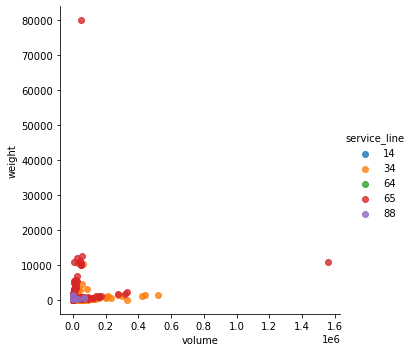

In [24]:
## Plot the weights Vs Volume with respect to each service line.
sns.lmplot(data=df3, x='volume', y='weight', hue='service_line', fit_reg = False)

<br></br>
## Let us convert all the units to non-imperial, to check if there could be a better trend formed in the visualization!  
<br></br>

In [31]:
def non_imperial_plot(df, df2):
    df3 = pd.concat([df.drop('package', 1), df2], 1)
    # 1 lbs = 0.453592 Kgs, 1 cu inch = 16.3871 cu cms
    df3.loc[df3["imperial_unit"] == "True", "weight"] =  df3.loc[df3["imperial_unit"] == "True", "weight"] * 0.453592
    df3.loc[df3["imperial_unit"] == "True", "volume"] =  df3.loc[df3["imperial_unit"] == "True", "volume"] * 16.3871

    # Remove imperial_unit column
    df3 = df3.drop('imperial_unit', 1)
    df3 = df3.drop('order_id', 1)

    df3['service_line'] = df3['service_line'].apply(lambda x: int(x))
    sns.lmplot(data=df3, x='volume', y='weight', hue='service_line', fit_reg = False)
    return df3


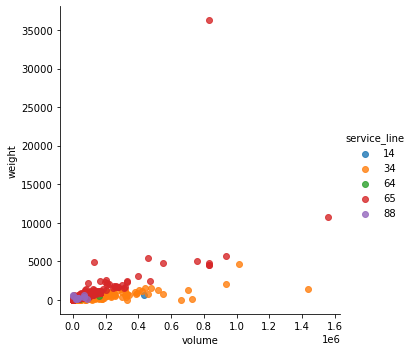

In [43]:
df4 = non_imperial_plot(df, df2)


<br></br>
## What we understood so far from EDA?

<br></br>
- We have 5 unique service lines in which '34' and '65' are highly populated as compared to others.
- The mean weight of all orders is 835.04 lbs, line 34's mean weight is ~690 lbs, which is lesser than overall mean, but line 65 carries orders with more weight than overall mean - 1195.643120 lbs.
- Looking at the std's, we could observe that line 88 has the least std as compared to lines 34 and 65. Which means that the orders in line 88 are in pretty restricted in weight and volume.
- Looking at the pearson's correlation coefficients between the variables, we could see that they are independent features with no significant relationships. Hence, developing regression models of any kind might not be a great option. 
- From the non-imperial plot, we can observe a clear distinctive differentiation for each service line. Service line 88 is for all the (low weight, low volume) orders. Service line 34 mainly deals with (high volume, low weight) orders and line 65 deals with (high volume, high weight) orders. 
- Also just by looking at weight and volume it is hard to classify which service line the order would go into is hard to predict since, we could observe a significant overlap between the orders from the plot. Especially line 88 orders with other lines. Hence, having more information about the order will help us dig deep and understand in much detail over which service line fits which of the order types. 
- However, there is a significant difference in line 34 and 65, which are the most populated service lines, hence, let us try to build a simple ML classifier that could predict the service line among 34 and 65 given the weight and volume.

In [44]:
## ML classifier for service_line 34 and 65. 
## remove other service lines which are sparsely populated.
df4['service_line'] = df4['service_line'].apply(lambda x: str(x))
df4 = df4[df4['service_line'].isin(['34', '65'])]
df4.reset_index(drop = True, inplace = True)
df4.shape

(979, 3)

In [45]:
# Divide the data into X and y
X = df4.drop('service_line', 1)
y = df4['service_line']

In [59]:
#Convert y into 0's and 1's (0's - 65, 1's - 34)
y = y.eq('34').mul(1)

In [46]:
# Scale the weights and volume columns.
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X)
X.reset_index(drop = True, inplace = True)

In [60]:
## Divide into test and train data:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20)

In [61]:
### Define Functions for accuracy measures
def accuracies(modl1):
    
    y_pred1 = modl1.predict(X_train) 
    count1 = 0
    for i in range(0, len(y_train)):
        if y_pred1[i] == float(y_train.iloc[i]):
            count1 = count1 + 1

    print("Training Accuracy: ", count1/len(y_train))
       
       
    
    y_pred1 = modl1.predict(X_test) 
    count1 = 0
    for i in range(0, len(y_test)):
        if y_pred1[i] == float(y_test.iloc[i]):
            count1 = count1 + 1
    
    print("Testing Accuracy: ", count1/len(y_test))


def F1_score(modl1, thresh):
    
    from sklearn.metrics import f1_score 
    
    y_pred = modl1.predict_proba(X_test)
    
    print('f1_score: ', f1_score(y_test, modl1.predict(X_test)))
    print('f1_score for 1: ', f1_score(y_test == 1, y_pred[:,1] > thresh)*100) 
    print('f1_score fot 0: ', f1_score(y_test == 0, y_pred[:,1] < thresh)*100)
    
def precision (modl1):
    from sklearn.metrics import precision_score
    
    y_pred1 = modl1.predict(X_train)
    print("Training Precision: ", precision_score(y_train, y_pred1))
    
    y_pred = modl1.predict(X_test)
    print("Testing Precision: ", precision_score(y_test, y_pred))
    pass

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
modl = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3,
                               max_features='auto', min_samples_split=3,
                               bootstrap=True, oob_score=True, random_state=41,
                               warm_start=True, class_weight='balanced', ccp_alpha=0.001,
                               max_samples=45).fit(X_train, y_train)
 
y_pred_test = modl.predict_proba(X_test)
y_pred_train = modl.predict_proba(X_train)
print ("Training AUC: ", roc_auc_score(y_train, y_pred_train[:,1]))
print ("Testing AUC: ", roc_auc_score(y_test, y_pred_test[:,1]))
accuracies(modl)
F1_score(modl, 0.5)
precision(modl)

C:\Users\Tejas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:569: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


Training AUC:  0.9491235403223699
Testing AUC:  0.9376236592731437
Training Accuracy:  0.8735632183908046
Testing Accuracy:  0.8775510204081632
f1_score:  0.8723404255319148
f1_score for 1:  87.23404255319149
f1_score fot 0:  88.23529411764706
Training Precision:  0.8822055137844611
Testing Precision:  0.9010989010989011


# Conclusion: 

- From the EDA we understood many hidden insights from the raw data which are mentioned in detail in an above cell. Using those insights we developed a ML model to classify if an order should be given service lines '34' or '65'. The classifier seems to give us an impressive outcome of ~0.94 AUC, ~88% accuracy. We could also see that the precision and recall are pretty well balanced. 